In [1]:
import numpy
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
# Read processed file

dataset = pd.read_csv(r"C:\Users\cinti\Documents\PythonF\Final_Project_ML\bidders_features.csv")eeee

In [3]:
dataset.head()

,bidder_id,total_bids,min_time,max_time,total_time,average_time,total_auction per user,mean_bids_per_auctions,mean_time_auction,total_country,...,books_music,clothing,computers,furniture,home_goods,jewelry,mobile,office_equipment,sporting_goods,outcome
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,24,9.759490e+15,9.772620e+15,2.343870e+17,9.766130e+15,18,1.333333,5.425630e+14,6,...,0,0,0,0,1,0,0,0,0,0
1,624f258b49e77713fc34034560f93fb3hu3jo,3,9.764050e+15,9.770510e+15,2.930060e+16,9.766870e+15,1,3.000000,9.766870e+15,1,...,0,0,0,0,0,0,0,1,0,0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,4,9.765400e+15,9.772540e+15,3.907760e+16,9.769390e+15,4,1.000000,2.442350e+15,1,...,0,0,0,0,0,0,0,0,1,0
3,4ab12bc61c82ddd9c2d65e60555808acqgos1,155,9.759250e+15,9.771230e+15,1.513130e+18,9.762120e+15,23,6.739130,4.244400e+14,2,...,0,0,0,0,0,0,0,1,0,0
4,7eaefc97fbf6af12e930528151f86eb91bafh,1,9.761130e+15,9.761130e+15,9.761130e+15,9.761130e+15,1,1.000000,9.761130e+15,1,...,0,0,0,0,0,0,1,0,0,0


In [4]:
# Features = X
X = dataset.iloc[:,:-1]
X = X.drop(columns=['bidder_id'])
X

,total_bids,min_time,max_time,total_time,average_time,total_auction per user,mean_bids_per_auctions,mean_time_auction,total_country,number_ip,...,auto_parts,books_music,clothing,computers,furniture,home_goods,jewelry,mobile,office_equipment,sporting_goods
0,24,9.759490e+15,9.772620e+15,2.343870e+17,9.766130e+15,18,1.333333,5.425630e+14,6,20,...,0,0,0,0,0,1,0,0,0,0
1,3,9.764050e+15,9.770510e+15,2.930060e+16,9.766870e+15,1,3.000000,9.766870e+15,1,3,...,0,0,0,0,0,0,0,0,1,0
2,4,9.765400e+15,9.772540e+15,3.907760e+16,9.769390e+15,4,1.000000,2.442350e+15,1,4,...,0,0,0,0,0,0,0,0,0,1
3,155,9.759250e+15,9.771230e+15,1.513130e+18,9.762120e+15,23,6.739130,4.244400e+14,2,123,...,0,0,0,0,0,0,0,0,1,0
4,1,9.761130e+15,9.761130e+15,9.761130e+15,9.761130e+15,1,1.000000,9.761130e+15,1,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411,248,9.759270e+15,9.772850e+15,2.421780e+18,9.765240e+15,91,2.725275,1.073100e+14,13,92,...,0,0,0,0,0,0,1,0,0,0
1412,11,9.759280e+15,9.771590e+15,1.074190e+17,9.765370e+15,2,5.500000,4.882680e+15,2,11,...,0,0,0,0,0,0,0,1,0,0
1413,149,9.759290e+15,9.771980e+15,1.455300e+18,9.767110e+15,64,2.328125,1.526110e+14,23,93,...,0,0,0,0,0,0,0,1,0,0
1414,2,9.762800e+15,9.772600e+15,1.953540e+16,9.767700e+15,1,2.000000,9.767700e+15,1,2,...,0,0,0,0,0,0,0,1,0,0


In [5]:
# Outcome Variable = y 
y = dataset.iloc[:,-1:]
y

,outcome
0,0
1,0
2,0
3,0
4,0
...,...
1411,0
1412,0
1413,0
1414,0


<ipython-input-6-6e358be0c1d9>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X, y)


Feature: 0, Score: 0.07726
Feature: 1, Score: 0.08295
Feature: 2, Score: 0.05838
Feature: 3, Score: 0.08269
Feature: 4, Score: 0.07911
Feature: 5, Score: 0.05165
Feature: 6, Score: 0.09388
Feature: 7, Score: 0.06608
Feature: 8, Score: 0.05197
Feature: 9, Score: 0.06224
Feature: 10, Score: 0.08003
Feature: 11, Score: 0.07870
Feature: 12, Score: 0.07530
Feature: 13, Score: 0.00007
Feature: 14, Score: 0.00307
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00964
Feature: 17, Score: 0.00013
Feature: 18, Score: 0.00951
Feature: 19, Score: 0.00822
Feature: 20, Score: 0.01262
Feature: 21, Score: 0.00479
Feature: 22, Score: 0.01172


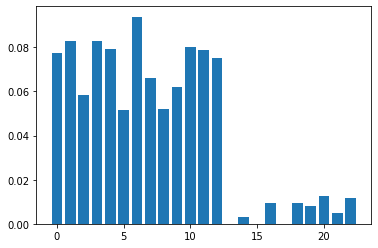

In [6]:
# Feature Importance using Random Forest  

model = RandomForestClassifier()

model.fit(X, y)

importance = model.feature_importances_

# Summary of the Feature Importance 

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [7]:
# Feature Selection with PCA (uses numpy)

dataframe = dataset.drop(columns=['bidder_id']) 
#bidder_id is not important information, it is just an id of the bidder that will be in the model to identify if that specific bidder_id is bot or human
array = dataframe.values

# created array (X_1 and y_1) to differentiate from the previous X and y 
X_1 = array[:,0:22]
y_1 = array[:,23]
X_1  

array([[2.40000e+01, 9.75949e+15, 9.77262e+15, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [3.00000e+00, 9.76405e+15, 9.77051e+15, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [4.00000e+00, 9.76540e+15, 9.77254e+15, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [1.49000e+02, 9.75929e+15, 9.77198e+15, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [2.00000e+00, 9.76280e+15, 9.77260e+15, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [2.00000e+00, 9.77076e+15, 9.77076e+15, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [9]:
y_1

array([0., 0., 0., ..., 0., 0., 0.])

In [20]:
#Feature Selection 

pca = PCA(n_components=3)
fit = pca.fit(X)
# summarize components


print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [9.99999997e-01 3.46995115e-09 3.30244981e-12]
[[ 2.22044605e-16  6.14142219e-08  7.32398169e-08  1.00000000e+00
   6.71116268e-08  9.13723413e-19  1.48750012e-19 -5.94477427e-06
   1.11391213e-19  3.30393191e-17  4.89979178e-20  1.91850698e-17
   1.60135250e-18  2.03929931e-24 -7.06920403e-23 -6.72722044e-24
  -2.95883346e-23  3.70339024e-23  5.99457824e-23 -7.19892144e-23
  -1.73756064e-22 -5.96722891e-23  3.13406179e-22]
 [-2.07716196e-16 -1.66492370e-03 -2.53139073e-03  5.94516189e-06
  -2.08957057e-03 -7.62583690e-15 -3.24807006e-16  9.99993227e-01
  -2.00602278e-15 -2.59994775e-14 -1.06623501e-16 -9.75273172e-15
  -1.01953244e-14 -2.86027562e-19  2.49052538e-18  1.26598576e-18
   5.44285752e-19 -8.38576976e-19 -1.88126954e-18 -5.71883622e-18
   4.72610298e-18 -1.18327367e-19 -1.83862205e-19]
 [ 1.69746772e-14 -5.60637747e-01 -5.93837975e-01  9.49988204e-08
  -5.77086223e-01 -6.44109274e-14 -1.19916724e-14 -3.64254207e-03
  -6.28934574e-15 -3.87452796e-13 -7.80

In [11]:
# PCA Feature Selection - Standardized values 

# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
# Standardize
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [14]:
explained_variance = pca.explained_variance_ratio_

In [15]:
explained_variance

array([2.49568622e-01, 1.29448276e-01, 8.14344622e-02, 6.49248073e-02,
       6.18931469e-02, 5.15725348e-02, 4.93416686e-02, 4.74946450e-02,
       4.52454681e-02, 4.42864532e-02, 4.42014908e-02, 4.33230575e-02,
       4.10557853e-02, 2.85415158e-02, 7.46790379e-03, 5.44345280e-03,
       2.58847591e-03, 1.32253929e-03, 7.95990966e-04, 4.58336058e-05,
       3.74070405e-06, 1.29386660e-07, 1.82215564e-32])

In [18]:
# Feature Extraction with RFE

# Using Logistic Regression because it is a classification problem
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 10) #10 most important features 
fit = rfe.fit(X_1, y_1)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

c:\users\cinti\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
c:\users\cinti\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\cinti\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status

Num Features: 10
Selected Features: [False False False False False False False False  True False False False
 False  True  True  True  True  True  True  True  True  True]
Feature Ranking: [13 12 11 10  9  8  7  6  1  5  2  4  3  1  1  1  1  1  1  1  1  1]
